In [3]:
# Python code for the paper : "Resampling and denoising deep learning algorithms impact on radiomics in brain metastases MRI"
# coding: utf-8
# @author: aureliencd 

from scipy import stats
import pandas as pad
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import math
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
from scipy.stats import pearsonr

In [2]:

#custom_palette = [sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"], "blue", "orange", "blue","yellow", "purple"]
custom_paletteGeneral = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple"]
sns.set_palette(custom_paletteGeneral)


\\s-grp\grp\_inter-services\Pôle Intelligence Artificielle\AA_PROJETS de R&D CFB\NLP_Qualit-IA


In [49]:
########################################
###        Path and dataframe        ###
########################################

df = pad.read_excel("Quantitative analysis MetIA_datascience.xlsx", header=0)

In [50]:
df

,Diameter_AI,Diameter_REF,Volume_AI (cm3),Volume_REF (cm3),Min intensity_AI,Min intensity_REF,Mean intensity_AI,Mean intensity_REF,Max intensity_AI,Max intensity_REF,SD intensity_AI,SD intensity_REF
0,13.83,14.76,0.95,0.99,219,26,489,486,681,681,88.70,94.40
1,12.84,13.41,0.78,0.91,107,107,408,397,605,605,94.30,96.30
2,6.19,8.29,0.08,0.22,297,244,422,400,534,534,37.70,44.50
3,16.67,17.42,1.60,1.54,119,129,346,351,510,510,61.00,56.00
4,7.86,8.03,0.14,0.15,203,70,384,338,576,522,70.00,119.00
5,5.28,7.74,0.07,0.13,179,72,396,377,522,576,67.00,87.00
6,20.46,21.60,2.86,3.57,87,43,343,337,628,628,82.00,84.00
7,27.15,27.59,4.42,5.04,100,73,422,414,874,874,138.00,139.00
8,5.23,7.51,0.04,0.16,269,259,446,427,737,737,86.00,81.00
9,13.66,13.61,0.94,1.03,238,227,524,515,824,824,142.00,145.00


In [6]:
###########################################################################################
### 																   		   	        ###
### Etude Concordance Correlation Coefficient (CCC) cf article Philippe Lambin et al    ###
### 																   		   	        ###
###########################################################################################


def ccc(x,y):
	sxy = np.sum((x - x.mean())*(y - y.mean()))/x.shape[0]      
	rhoc = 2*sxy / (np.var(x) + np.var(y) + (x.mean() - y.mean())**2)      
	return rhoc  

In [51]:
CCCresults = []
CCCresults.append(ccc(df["Diameter_AI"], df["Diameter_REF"]))
CCCresults.append(ccc(df["Volume_AI (cm3)"], df["Volume_REF (cm3)"]))
CCCresults.append(ccc(df["Min intensity_AI"], df["Min intensity_REF"]))
CCCresults.append(ccc(df["Mean intensity_AI"], df["Mean intensity_REF"]))
CCCresults.append(ccc(df["Max intensity_AI"], df["Max intensity_REF"]))
CCCresults.append(ccc(df["SD intensity_AI"], df["SD intensity_REF"]))
CCCresults

[0.9318681074061881,
 0.9710567799055407,
 0.7639667777310274,
 0.9760548344970568,
 0.9929299600479569,
 0.934386320692495]

In [52]:
df.columns

Index(['Diameter_AI', 'Diameter_REF', 'Volume_AI (cm3)', 'Volume_REF (cm3)',
       'Min intensity_AI', 'Min intensity_REF', 'Mean intensity_AI',
       'Mean intensity_REF', 'Max intensity_AI', 'Max intensity_REF',
       'SD intensity_AI', 'SD intensity_REF'],
      dtype='object')

In [56]:
Featurs = ["Diameter", "Volume", "Min intensity", "Mean intensity", "Max intensity", "SD intensity"]

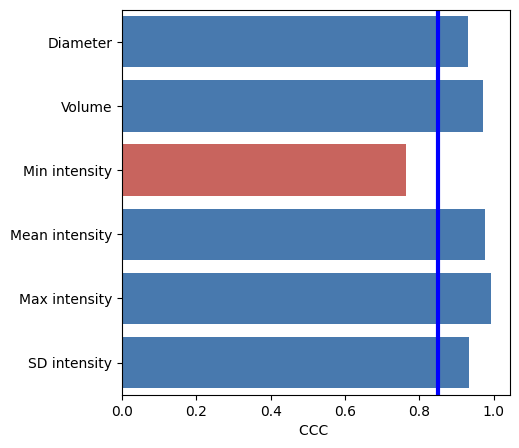

In [59]:
### Save CCC ###
def saveCCC(CCC, Featurs):
	df_CustomPalette = pad.DataFrame(CCC, columns = ['CCC'])
	df_CustomPalette['Featurs'] = Featurs
	custom_palette = {}
	for q in set(df_CustomPalette.Featurs):
		val = df_CustomPalette[df_CustomPalette.Featurs == q].CCC
		if val.values < 0.85:
			custom_palette[q] = sns.xkcd_rgb["pale red"]
		else:
			custom_palette[q] = sns.xkcd_rgb["windows blue"]
	plt.figure(figsize=(5,5))
	plt.axvline(0.85, 0,1, linewidth=3, color='b')
	ax = sns.barplot(x=CCC, y=Featurs, palette=custom_palette)
	ax.set(xlabel="CCC ")
	figure = ax.get_figure()
	figure.savefig("CCC", dpi=400, bbox_inches='tight')
	plt.show()

saveCCC(CCCresults, Featurs)

In [5]:
########################################
###        Dataframe        ###
########################################

df = pad.read_excel("Quantitative analysis MetIA_datascience_diameters.xlsx", header=0)

In [7]:
#custom_palette = [sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"], "blue", "orange", "blue","yellow", "purple"]
custom_paletteGeneral = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple"]
sns.set_palette(custom_paletteGeneral)

In [11]:
df

,Brain metastases ID,Lesion diameter (mm),Lesion volume (cm3),Group
0,1,13.83,0.95,AI
1,2,12.84,0.78,AI
2,3,6.19,0.08,AI
3,4,16.67,1.60,AI
4,5,7.86,0.14,AI
...,...,...,...,...
57,27,12.78,0.56,REF
58,28,6.76,0.09,REF
59,29,11.52,0.39,REF
60,30,7.09,0.08,REF


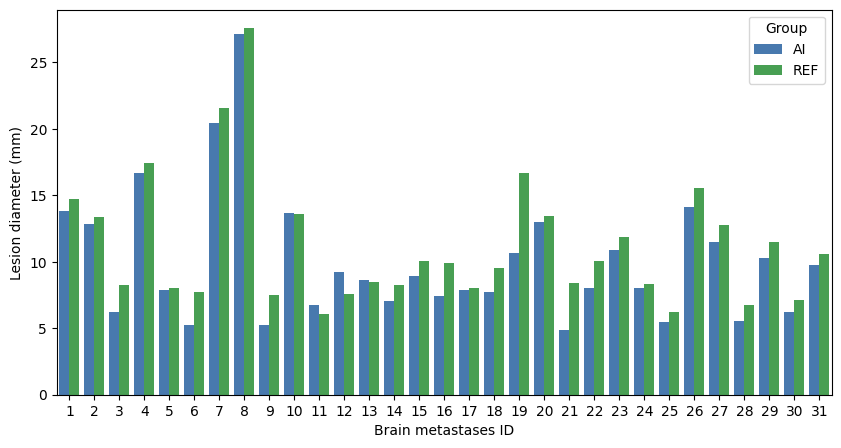

In [38]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="Brain metastases ID", y="Lesion diameter (mm)", hue="Group")
figure = ax.get_figure()
figure.savefig("histo_diameter", dpi=400, bbox_inches='tight')
plt.show()

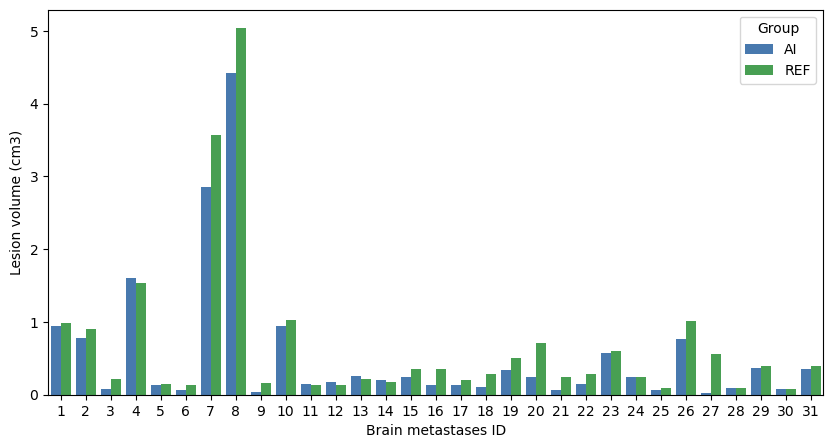

In [13]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=df, x="Brain metastases ID", y="Lesion volume (cm3)", hue="Group")
figure = ax.get_figure()
figure.savefig("histo_diameter", dpi=400, bbox_inches='tight')
plt.show()